## LAB1: Gerações, representações e transformações de dados multivariados

<hr style="border:1px  solid black"> </hr>

### (Preencher)
## Nome: Tomás Gomes
## Número: 48614

<hr style="border:1px  solid black"> </hr>

## Desenvolva e corra o código pedido nas células imediatamente abaixo das perguntas.

# IMPORTANTE:
## Uma vez completado, grave este Jupyter notebook com o seguinte nome:
## Axxxxx-Lab1.ipynb (Axxxxx: número de aluno)
##  e depois submeta o ficheiro no link do Moodle providenciado para o efeito.
# Ficheiros que não se encontrem em conformidade com o formato especificado não serão corrigidos!

<hr style="border:2px solid black"> </hr>


In [2]:
import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt
import scipy.linalg as la
rd.seed(42)

# Pergunta 1:
## a) Gere 5000 (5 mil) pontos a duas dimensões, em que a primeira dimensão é uma variável aleatória Gaussina de média 2 e variância 3, e em que a segunda dimensão é uma variável aleatória uniformemente distribuída entre $[-1, 3]$. Os pontos gerados deverão estar num matriz $X$ de $2\times5000$.
## b) Visualize os pontos gerados. Certifique-se que no gráfico, ambas as dimensões se encontram na mesma escala.

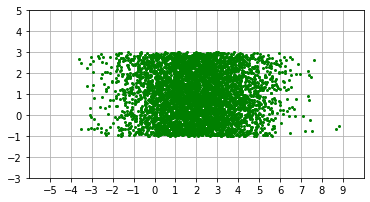

In [3]:
X = np.vstack((rd.randn(5000)*np.sqrt(3) + 2,
               rd.rand(5000)*4 - 1))

plt.plot(X[0,:], X[1,:], '.g', markersize=4)
plt.grid()

#escalamento
plt.xticks(range(-5,10))
plt.axis('scaled')
plt.axis([-6,10,-3,5])
plt.show()

# Pergunta 2:
## a) Através duma transformação matricial do tipo $X2=A\times X+b$ ($A$ matriz de $2\times2$, $b$ vetor de $2\times1$), transforme os dados de modo a estes terem média nula e matriz de covariância igual à matriz de identidade (de notar que a variância da primeira e da segunda dimensão de $X$ são 3 e 4/3, respetivamente).
## b) Através duma transformação matricial do tipo $X3=C\times X2$ ($C$ matriz de $2\times2$), transforme os dados de modo a estes terem a matriz de covariância $\Sigma=\begin{bmatrix}2.5&1\\1&0.5\end{bmatrix}$.
## c) Visualize os pontos gerados (matriz $X3$). Vizualise igualmente no mesmo gráfico os pontos da alínea anterior (matriz $X$). Certifique-se que no gráfico, ambas as dimensões se encontram na mesma escala. 

Cov de X2:
 [[ 0.99297205 -0.00504236]
 [-0.00504236  0.97840913]] 
Média de X2:
 [ 0.00560193 -0.01792302]
Cov de X3:
 [[2.47122586 0.98428896]
 [0.98428896 0.49032411]] 
Média de X3:
 [-0.00055861 -0.00616054]


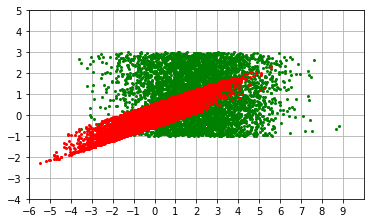

In [7]:
#média
b = np.array(([2],[1]))

#inversa cov 
A = np.array(([1./3, 0]
             ,[0, 3./4]))

A = la.sqrtm(A)

#subtrair média
Xn = X - b

#transformacao
X2 = np.dot(A, Xn) 

print('Cov de X2:\n',np.cov(X2),'\nMédia de X2:\n',np.mean(X2,axis=1))

#Cov
S1 = np.array([[2.5, 1.]
              ,[1., 0.5]])

C = la.sqrtm(S1)

#transformacao
X3 = np.dot(C,X2)

print('Cov de X3:\n',np.cov(X3), '\nMédia de X3:\n',np.mean(X3,axis=1))

plt.plot(X[0,:],X[1,:],'.g',X3[0,:],X3[1,:],'.r', markersize=4)

#escalamentos
plt.xticks(range(-6,10))
plt.axis('scaled')
plt.axis([-6,10,-4,5])
plt.grid()
plt.show()


# Pergunta 3:
## Considere uma matriz $X4$ de $2\times10000$ obtida com a concatenação das matrizes $X$ e $X3$. Faça os histogramas de cada dimensão dos dados da matriz $X4$. Certifique-se que o número de intervalos é apropriado, e a sua largura também, para uma boa visualização dos mesmos.

X
 [[ 2.86033415  1.76051921  3.12182946 ...  7.39171863  3.39955973
   0.5311073 ]
 [-0.32705368 -0.24026103  0.84284869 ...  1.91909055 -0.34131895
   1.26327197]]
X3
 [[ 0.17044013 -0.74444523  0.90348429 ...  5.06734318  0.63124614
  -1.15809829]
 [-0.32627402 -0.60618093  0.25579575 ...  1.95443298 -0.17679005
  -0.31003269]]
X4
 [[ 2.86033415  1.76051921  3.12182946 ...  5.06734318  0.63124614
  -1.15809829]
 [-0.32705368 -0.24026103  0.84284869 ...  1.95443298 -0.17679005
  -0.31003269]]


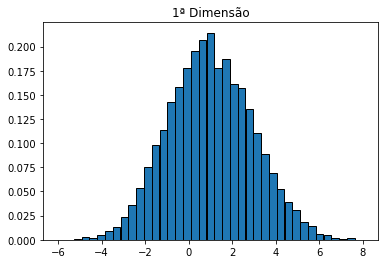

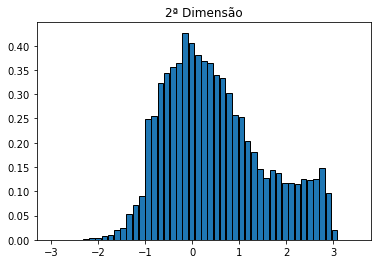

In [19]:
X4 = np.hstack((X,X3))
print('X\n',X)
print('X3\n',X3)
print('X4\n',X4)

hx1,b1 = np.histogram(X4[0,:],np.linspace(-6,8,40),density=True)

b1 = (b1[:-1]+b1[1:])/2

plt.title('1ª Dimensão')
plt.bar(b1,hx1,width=.35,alpha=1, edgecolor='black')

plt.figure()

hx2,b2 = np.histogram(X4[1,:],np.linspace(-3,3.5,50),density=True)

b2 = (b2[:-1]+b2[1:])/2

plt.title('2ª Dimensão')
plt.bar(b2,hx2,width=.12,alpha=1, edgecolor='black')

plt.show()
